<a href="https://colab.research.google.com/github/tejaswini182001/sentiment-analysis/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow_datasets as tfds
import tensorflow as tf

In [ ]:
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

In [ ]:
train_examples_batch, train_labels_batch = next(iter(train_dataset))
print(train_examples_batch)
print(train_labels_batch)

tf.Tensor(
[  62   18   41  604  927   65    3  644 7968   21   35 5096   36   11
   43 2948 5240  102   50  681 7862 1244    3 3266   29  122  640    2
   26   14  279  438   35   79  349  384   11 1991    3  492   79  122
  188  117   33 4047 4531   14   65 7968    8 1819 3947    3   62   27
    9   41  577 5044 2629 2552 7193 7961 3642    3   19  107 3903  225
   85  198   72    1 1512  738 2347  102 6245    8   85  308   79 6936
 7961   23 4981 8044    3 6429 7961 1141 1335 1848 4848   55 3601 4217
 8050    2    5   59 3831 1484 8040 7974  174 5773   22 5240  102   18
  247   26    4 3903 1612 3902  291   11    4   27   13   18 4092 4008
 7961    6  119  213 2774    3   12  258 2306   13   91   29  171   52
  229    2 1245 5790  995 7968    8   52 2948 5240 8039 7968    8   74
 1249    3   12  117 2438 1369  192   39 7975], shape=(163,), dtype=int64)
tf.Tensor(0, shape=(), dtype=int64)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
encoder = info.features['text'].encoder
print('Vocabulary size: {}'.format(encoder.vocab_size))

Vocabulary size: 8185


In [ ]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE)

test_dataset = test_dataset.padded_batch(BATCH_SIZE)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(encoder.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 64)          523840    
                                                                 
 bidirectional_2 (Bidirectio  (None, None, 128)        66048     
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 64)               41216     
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                

In [ ]:
model.compile(loss = tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.Adam(1e-4),
              metrics = ['accuracy'])

In [ ]:
history = model.fit(train_dataset, epochs = 10, validation_data = test_dataset, validation_steps = 30)

Epoch 1/10
391/391 [==============================] - 356s 890ms/step - loss: 0.6682 - accuracy: 0.5363 - val_loss: 0.5172 - val_accuracy: 0.7344
Epoch 2/10
391/391 [==============================] - 354s 904ms/step - loss: 0.3822 - accuracy: 0.8395 - val_loss: 0.3936 - val_accuracy: 0.8391
Epoch 3/10
391/391 [==============================] - 358s 913ms/step - loss: 0.2631 - accuracy: 0.9010 - val_loss: 0.3431 - val_accuracy: 0.8635
Epoch 4/10
391/391 [==============================] - 362s 922ms/step - loss: 0.2095 - accuracy: 0.9260 - val_loss: 0.3981 - val_accuracy: 0.8594
Epoch 5/10
391/391 [==============================] - 362s 923ms/step - loss: 0.1732 - accuracy: 0.9437 - val_loss: 0.3849 - val_accuracy: 0.8667
Epoch 6/10
391/391 [==============================] - 369s 941ms/step - loss: 0.1479 - accuracy: 0.9546 - val_loss: 0.4220 - val_accuracy: 0.8620
Epoch 7/10
391/391 [==============================] - 365s 931ms/step - loss: 0.1217 - accuracy: 0.9647 - val_loss: 0.4653 -

In [ ]:
test_loss, test_acc = model.evaluate(test_dataset)

print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

391/391 [==============================] - 172s 440ms/step - loss: 0.5729 - accuracy: 0.8521
Test Loss: 0.5728806257247925
Test Accuracy: 0.8520799875259399


In [ ]:
def pad_to_size(vec, size):
  zeros = [0] * (size - len(vec))
  vec.extend(zeros)
  return vec

In [ ]:
def sample_predict(sample_pred_text, pad):
  encoded_sample_pred_text = encoder.encode(sample_pred_text)

  if pad:
    encoded_sample_pred_text = pad_to_size(encoded_sample_pred_text, 64)
  encoded_sample_pred_text = tf.cast(encoded_sample_pred_text, tf.float32)
  predictions = model.predict(tf.expand_dims(encoded_sample_pred_text, 0))
  print("Prediction Score: ", predictions)
  output = ""
  if predictions[0][0] >= 0.5: output = "POSITIVE"
  elif predictions[0][0] <= -1: output = "NEGATIVE"
  else: output = "NEUTRAL"

  return output

In [ ]:
sample_pred_text = ('The movie was not good. The animation and the graphics were terrible. I would not recommend this movie.')
predictions = sample_predict(sample_pred_text, pad = False)
print(predictions)

Prediction Score:  [[-2.848029]]
NEGATIVE


In [ ]:
sample_pred_text = ('Saw this movie yesterday and man, it was a spectacle of another level. Right from the start, the movie keeps you bounded to your seats with excitement and surprise while the breathtaking visuals lures you into another dimension of cinematic experience. This movie is like nothing you would have ever seen before!')
predictions = sample_predict(sample_pred_text, pad = False)
print(predictions)

Prediction Score:  [[4.918988]]
POSITIVE


In [ ]:
sample_pred_text = ('Except visuals nothing is good in this film. Total disappointment to prabhas fans. In some scenes i thought did prabhas forgot acting? Poor chemistry. Pooja hegde did her glamor role good. Remaining big actors are waste for this film. They have no screen time or anything else. And coming to climax i donno how can the film makers think of doing a copy of titanic scenes. Very unrealistic climax.')
predictions = sample_predict(sample_pred_text, pad = False)
print(predictions)

Prediction Score:  [[-5.538701]]
NEGATIVE


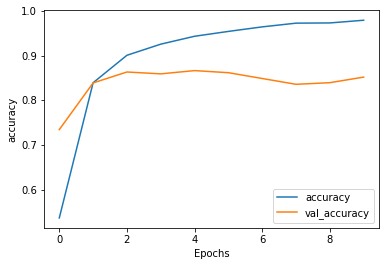

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])
  plt.show()

plot_graphs(history, 'accuracy')